<a href="https://colab.research.google.com/github/HeoYurim/Colab/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀
### 농어의 길이만 사용

In [20]:
import numpy as np

In [21]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [22]:
import matplotlib.pyplot as plt

In [23]:
print(perch_length.shape, perch_weight.shape)  #1차원

(56,) (56,)


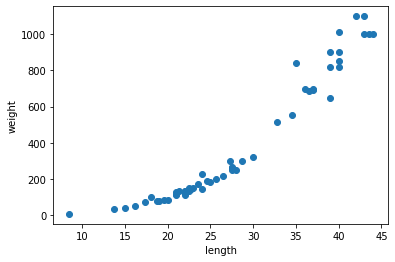

In [24]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 훈련 세트 준비

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [27]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [28]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [29]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### K-최근접 이웃 회귀 모델 훈련

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [32]:
knr.score(test_input, test_target)

0.992809406101064

1이랑 가까울수록 좋음

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
test_prediction = knr.predict(test_input)

In [35]:
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


값이 커질수록 성능 안좋음

### 과대적합과 과소적합

In [36]:
knr.score(train_input, train_target)

0.9698823289099254

In [37]:
knr.score(test_input, test_target)

0.992809406101064

### 이웃 개수 줄이기(5개→3개)

In [38]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [39]:
print(knr.score(train_input, train_target))

0.9804899950518966


In [40]:
print(knr.score(test_input, test_target))

0.9746459963987609


### 훈련 세트와 예측 결과 그래프

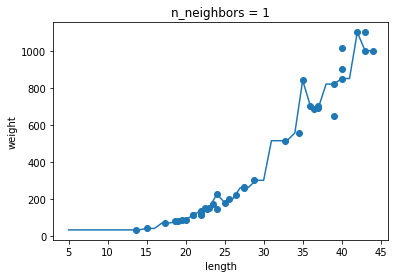

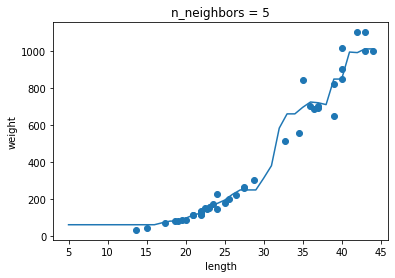

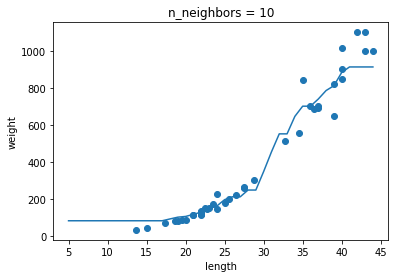

In [41]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()

# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5,45).reshape(-1,1)

# n = 1,5,10일 때 예측 결과를 그래프로 그립니다.
for n in[1,5,10]:
  # 모델 훈련
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  # 지정한 범위 x에 대한 예측 구하기
  prediction = knr.predict(x)
  # 훈련 세트와 예측 결과 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

## 선형 회귀

### 아주 큰 농어

In [42]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [43]:
print(knr.score(train_input, train_target))

0.9804899950518966


In [44]:
print(knr.score(test_input, test_target))

0.9746459963987609


In [45]:
print(knr.predict([[50]]))

[1033.33333333]


In [46]:
print(knr.predict([[100]]))

[1033.33333333]


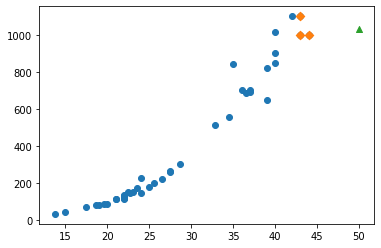

In [47]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes] , train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

#선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [50]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


### 학습한 직선 그리기

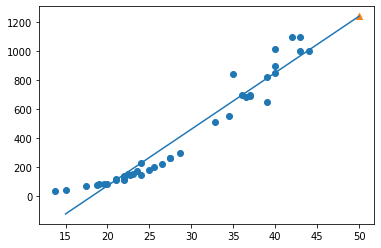

In [51]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')

plt.show()

In [52]:
print(lr.score(train_input, train_target))

0.939846333997604


In [53]:
print(lr.score(test_input, test_target))

0.8247503123313558


### 다항 회귀

In [54]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

### 모델 다시 훈련

In [55]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [56]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [57]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


무게 = (1.01 * 길이^2) - (21.6 * 길이) + 116.05

### 학습한 직선 그리기

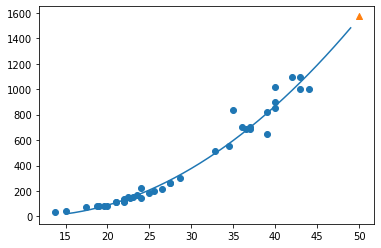

In [58]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15,50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')

plt.show()

In [59]:
print(lr.score(train_poly, train_target))

0.9706807451768623


In [60]:
print(lr.score(test_poly, test_target))

0.9775935108325121


### 판다스로 데이터 준비

In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

In [63]:
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [64]:
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [65]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

### 다항 특성 만들기

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
#degree = 2
poly = PolynomialFeatures()
poly.fit([[2,3]])

PolynomialFeatures()

In [68]:
# 1(bias), 2, 3, 2**, 2*3, 3**2
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


### LinearRegression

In [69]:
poly = PolynomialFeatures(include_bias= False)

In [70]:
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [71]:
print(train_poly.shape)

(42, 9)


In [72]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [73]:
test_poly = poly.transform(test_input)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [76]:
print(lr.score(train_poly, train_target))

0.9903183436982124


In [77]:
print(lr.score(test_poly, test_target))

0.9714559911594132


### 더 많은 특성 만들기

In [78]:
poly = PolynomialFeatures(degree=5, include_bias=False)

In [79]:
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [80]:
print(train_poly.shape)

(42, 55)


In [81]:
lr.fit(train_poly, train_target)

LinearRegression()

In [82]:
print(lr.score(train_poly, train_target))

0.9999999999991096


In [83]:
print(lr.score(test_poly, test_target))

-144.40579242335605


### 규제 전에 표준화

In [86]:
from sklearn.preprocessing import StandardScaler

In [88]:
ss = StandardScaler()

In [89]:
ss.fit(train_poly)

StandardScaler()

In [90]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀

In [91]:
from sklearn.linear_model import Ridge

In [92]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [93]:
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [94]:
print(ridge.score(test_scaled, test_target))

0.9790693977615397


### 적절한 규제 강도 찾기

In [95]:
train_score = [ ]
test_score = [ ]

In [96]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100 ]

In [97]:
for alpha in alpha_list:
  #릿지 모델을 만듭니다
  ridge = Ridge(alpha = alpha)
  #릿지 모델을 훈련합니다
  ridge.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장합니다
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

In [98]:
import matplotlib.pyplot as plt

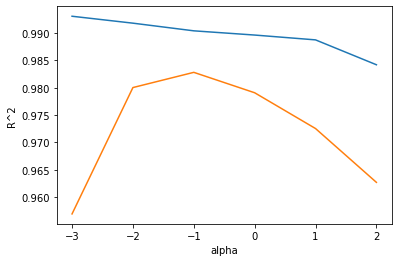

In [99]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [100]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

Ridge(alpha=0.1)

In [101]:
print(ridge.score(train_scaled, train_target))

0.9903815817570366


In [102]:
print(ridge.score(test_scaled, test_target))

0.9827976465386927


### 라쏘 회귀

In [103]:
from sklearn.linear_model import Lasso

In [104]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso()

In [105]:
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [106]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [107]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

Lasso(alpha=10)

In [108]:
print(lasso.score(train_scaled, train_target))

0.9888067471131867


In [109]:
print(lasso.score(test_scaled, test_target))

0.9824470598706695


In [110]:
print(np.sum(lasso.coef_ == 0))

40


In [111]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 12.14852453, 55.44856399,
       42.23100799,  0.        ,  0.        , 13.70596191,  0.        ,
       43.2185952 ,  5.7033775 , 47.46254536,  7.42309425, 11.85823365,
        0.        ,  0.        , 13.53038193, 21.22111356,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       18.66993032,  0.        ,  0.        ,  0.        , 15.81041778,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 18.14672268,
        0.        ,  0.        ,  0.        ,  0.        , 15.51272953,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

### 로지스틱 회귀

In [112]:
import pandas as pd

In [113]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [114]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [115]:
fish_target = fish['Species'].to_numpy()

In [116]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

In [117]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k - 최근접 이웃의 다중 분류

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [120]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [121]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [122]:
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


### 로지스틱 회귀(이진 분류)

In [123]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [128]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [129]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


### 로지스틱 회귀 계수 확인

In [130]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [132]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [133]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀(다중 분류)

In [134]:
lr = LogisticRegression(C = 20, max_iter=1000)
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [135]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [136]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [137]:
print(lr.coef_.shape, lr.intercept_.shape) # 7은 클라스

(7, 5) (7,)


### 소프트맥스 함수

In [138]:
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [139]:
from scipy.special import softmax

In [141]:
proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
